In [4]:
!pip install pymysql
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from AnalyzerFolder import Analyzer

  Using cached PyMySQL-1.0.2-py3-none-any.whl (43 kB)


In [28]:
mk = Analyzer.MarketDB()
stock = ['삼성전자', 'SK하이닉스', 'NAVER', '카카오']
df = pd.DataFrame()
for i in stock:
    df[i] = mk.get_daily_price(i, '2018-10-03', '2021-08-28')['close']

df

,삼성전자,SK하이닉스,NAVER,카카오
date,,,,
2018-10-04,44700,70000,695000,112000
2018-10-05,44700,70300,704000,109000
2018-10-08,44950,71200,704000,107500
2018-10-10,45300,70300,704000,104000
2018-10-11,43100,69000,704000,98500
...,...,...,...,...
2021-08-12,77000,100500,440500,147500
2021-08-13,74400,101500,436500,146000
2021-08-17,74200,101500,428500,142000


In [29]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean()
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

annual_cov

,삼성전자,SK하이닉스,NAVER,카카오
삼성전자,509.800419,751.154876,2804.820252,935.773566
SK하이닉스,751.154876,1106.932269,4133.580001,1378.980532
NAVER,2804.820252,4133.580001,15440.590788,5150.278857
카카오,935.773566,1378.980532,5150.278857,1718.391847


In [30]:
port_ret = []      # 종목 비중 다르게 해 Portfolio 20,000개 생성하기 위한 단계
port_risk = []     # 포트 수익률, 리스크, 비중 저장할 리스트 생성
port_weights = []  #

In [31]:
for _ in range(20000): # 몬테카를로 시뮬레이션 이용해 Portfolio 20,000개 생성
    weights = np.random.random(len(stock))  # stock 개수의 랜덤 숫자로 구성된 배열 생성
    weights /= np.sum(weights)  # 비중의 합이 1이 되도록 조정

    returns = np.dot(weights, annual_ret)  # np.dot 사용해 [(종목별 비중 배열) * (종목별 연간 수익률) = Portfolio 전체 returns] 구하기
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))  # sqrt((공분산*비중) * 비중의 전치행렬) = Portfolio 전체 Risk 구하기

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights) 
    
portfolio = {'Returns': port_ret, 'Risk': port_risk}

In [32]:
for i, s in enumerate(stock):  # i 값은 0, 1, 2, 3 순으로, s값은 '삼성전자', 'SK하이닉스', 'NAVER', '카카오' 순으로
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk'] + [s for s in stock]]
df

,Returns,Risk,삼성전자,SK하이닉스,NAVER,카카오
0,0.140052,59.457105,0.255998,0.166959,0.292304,0.284739
1,0.122650,52.077916,0.352049,0.113782,0.219830,0.314338
2,0.173468,73.653066,0.013052,0.394968,0.430887,0.161093
3,0.093300,39.648689,0.373624,0.219340,0.085073,0.321963
4,0.150715,63.985759,0.156039,0.262119,0.333611,0.248231
...,...,...,...,...,...,...
19995,0.133387,56.641726,0.225434,0.247771,0.259323,0.267472
19996,0.153367,65.101577,0.258133,0.119658,0.356280,0.265928
19997,0.151532,64.328162,0.264786,0.128667,0.349347,0.257200
19998,0.142542,60.501140,0.053633,0.356777,0.277540,0.312050


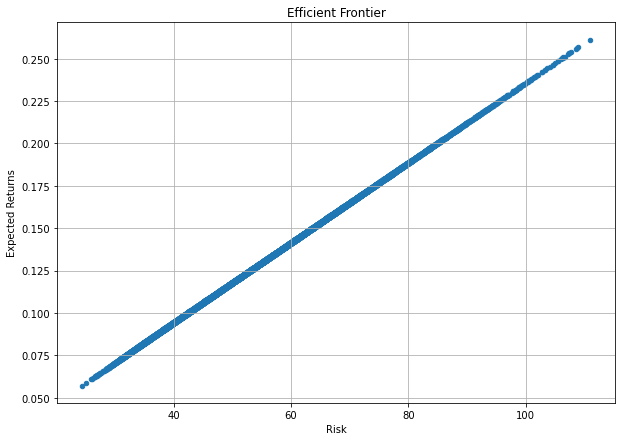

In [33]:
df.plot.scatter(x='Risk', y='Returns', figsize=(10,7), grid=True)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()